---
## **3 Getting started with neural networks**
---

Este capítulo está diseñado para comenzar a usar redes neuronales para resolver problemas reales.
problemas. Consolidará los conocimientos adquiridos en nuestra primera práctica
ejemplo en el capítulo 2, y aplicará lo que ha aprendido a tres nuevos problemas
cubriendo los tres casos de uso más comunes de redes neuronales: clasificación binaria, clasificación multiclase y regresión escalar.
  En este capítulo, analizaremos más de cerca los componentes centrales de las redes neuronales.
que presentamos en el capítulo 2: capas, redes, funciones objetivo y optimizadores. Le daremos una introducción rápida a Keras, la biblioteca de aprendizaje profundo de Python
que usaremos a lo largo del libro. Configurará una estación de trabajo de aprendizaje profundo, con Compatibilidad con TensorFlow, Keras y GPU. Nos sumergiremos en tres ejemplos introductorios de
cómo utilizar las redes neuronales para abordar problemas reales:

* Clasificación de reseñas de películas como positivas o negativas (clasificación binaria)
* Clasificación de cables de noticias por tema (clasificación multiclase)
* Estimación del precio de una casa, dados los datos inmobiliarios (regresión)

Al final de este capítulo, podrá usar redes neuronales para resolver simples
problemas de la máquina, como clasificación y regresión sobre datos vectoriales. Entonces tu
estar preparado para empezar a construir una comprensión más basada en principios y basada en la teoría de la máquina
aprendizaje en el capítulo 4.

**3.1 Anatomy of a neural network**

Como viste en los capítulos anteriores, el entrenamiento de una red neuronal gira en torno a los siguientes objetos:

* Capas, que se combinan en una red (o modelo)
* Los datos de entrada y los objetivos correspondientes
* La función de pérdida, que define la señal de retroalimentación utilizada para el aprendizaje.
* El optimizador, que determina cómo procede el aprendizaje

Puede visualizar su interacción como se ilustra en la figura 3.1: la red, compuesta
de capas que están encadenadas juntas, asigna los datos de entrada a las predicciones. La función de pérdida luego compara estas predicciones con los objetivos, produciendo un valor de pérdida: una medida
de qué tan bien coinciden las predicciones de la red con lo esperado. El optimizador usa
este valor de pérdida para actualizar los pesos de la red.

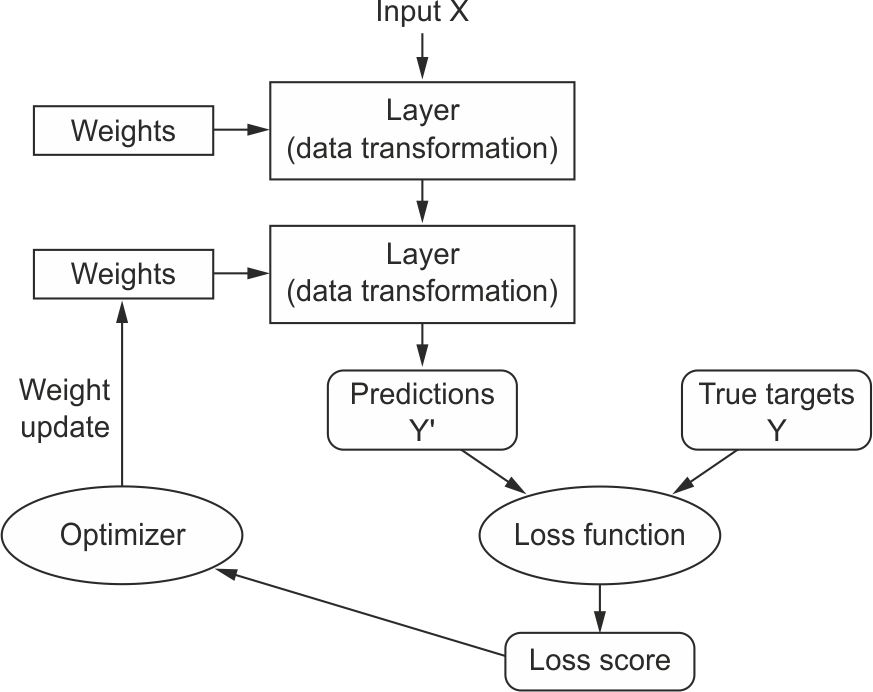

**3.1.1 Layers: the building blocks of deep learning**

La estructura de datos fundamental en las redes neuronales es la capa a la que estaba
introducido en el capítulo 2. Una capa es un módulo de procesamiento de datos que toma como entrada uno o
más tensores y eso genera uno o más tensores. Algunas capas son apátridas, pero
con más frecuencia, las capas tienen un estado: los pesos de la capa, uno o varios tensores aprendidos
con descenso de gradiente estocástico, que en conjunto contienen el conocimiento de la red.

 Las diferentes capas son apropiadas para diferentes formatos de tensores y diferentes tipos de datos.
Procesando. Por ejemplo, datos vectoriales simples, almacenados en tensores de forma 2D (muestras,
características), a menudo se procesa mediante capas densamente conectadas, también llamadas completamente conectadas o densas
capas (la clase Densa en Keras). Datos de secuencia, almacenados en tensores de forma 3D (muestras,
pasos de tiempo, características), normalmente se procesa mediante capas recurrentes, como una capa LSTM.
Los datos de imagen, almacenados en tensores 4D, generalmente se procesan mediante capas de convolución 2D (Conv2D).

Puede pensar en las capas como los ladrillos LEGO del aprendizaje profundo, una metáfora que
hecho explícito por marcos como Keras. Construir modelos de aprendizaje profundo en Keras es
hecho recortando capas compatibles para formar tuberías útiles de transformación de datos. La noción de compatibilidad de capas aquí se refiere específicamente al hecho de que cada capa
solo aceptará tensores de entrada de una forma determinada y devolverá tensores de salida de una forma determinada. Considere el siguiente ejemplo:

In [ ]:
## A dense layer with 32 output units:
from keras import layers
layer = layers.Dense(32, input_shape = (784,)) 

Estamos creando una capa que solo aceptará como entrada tensores 2D donde la primera dimensión es 784 (el eje 0, la dimensión del lote, no está especificado y, por lo tanto, cualquier valor sería
aceptado). Esta capa devolverá un tensor donde la primera dimensión se ha transformado para ser 32.

  Por lo tanto, esta capa solo se puede conectar a una capa descendente que espera 32-
vectores dimensionales como entrada. Al usar Keras, no tiene que preocuparse por
compatibilidad, porque las capas que agrega a sus modelos se construyen dinámicamente para
coincidir con la forma de la capa entrante. Por ejemplo, suponga que escribe lo siguiente:

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

La segunda capa no recibió un argumento de forma de entrada, sino que automáticamente
infería su forma de entrada como la forma de salida de la capa anterior.

**3.1.2 Models: networks of layers**

Un modelo de aprendizaje profundo es un gráfico acíclico dirigido de capas. Los más comunes
instancia es una pila lineal de capas, mapeando una sola entrada a una sola salida.

  Pero a medida que avance, estará expuesto a una variedad mucho más amplia de redes
topologías. Algunos comunes incluyen los siguientes:
* Redes de dos ramas
* Redes multicabezal
* Bloques de inicio

La topología de una red define un espacio de hipótesis. Quizás recuerde que en el capítulo 1, definimos el aprendizaje automático como "buscar representaciones útiles de algunos
datos de entrada, dentro de un espacio predefinido de posibilidades, utilizando la guía de una retroalimentación
señal." Al elegir una topología de red, limita su espacio de posibilidades
(espacio de hipótesis) a una serie específica de operaciones de tensor, mapeando datos de entrada a datos de salida. Entonces, lo que buscará es un buen conjunto de valores para los tensores de peso involucrados en estas operaciones de tensor.

Elegir la arquitectura de red adecuada es más un arte que una ciencia; y aunque
hay algunas mejores prácticas y principios en los que puede confiar, solo la práctica puede ayudar
te conviertes en un arquitecto de redes neuronales adecuado. Los próximos capítulos enseñarán
Explica los principios para construir redes neuronales y te ayuda a desarrollar la intuición como
a lo que funciona o no para problemas específicos.

**3.1.3 Loss functions and optimizers:**

claves para configurar el proceso de aprendizaje
Una vez que se define la arquitectura de la red, todavía tiene que elegir dos cosas más:
* Función de pérdida (función objetivo): la cantidad que se minimizará durante
formación. Representa una medida del éxito de la tarea en cuestión.
* Optimizador: determina cómo se actualizará la red según la función de pérdida. Implementa una variante específica de descenso de gradiente estocástico (SGD).

Una red neuronal que tiene múltiples salidas puede tener múltiples funciones de pérdida (una por
salida). Pero el proceso de descenso de gradiente debe basarse en un único valor de pérdida escalar;
por lo tanto, para redes de varios equipos, todas las pérdidas se combinan (mediante promediado) en un solo escalar
cantidad.

 Elegir la función objetiva correcta para el problema correcto es extremadamente importante: su red tomará cualquier atajo que pueda, para minimizar la pérdida; entonces si el objetivo
no se correlaciona completamente con el éxito de la tarea en cuestión, su red terminará
haciendo cosas que quizás no quisiste. Imagina una IA estúpida y omnipotente entrenada a través de
SGD, con esta función objetivo mal elegida: “maximizar el bienestar promedio
de todos los humanos vivos ". Para facilitar su trabajo, esta IA podría optar por matar a todos los humanos.
excepto unos pocos y centrarse en el bienestar de los restantes, porque el promedio
el bienestar no se ve afectado por la cantidad de seres humanos que quedan. Puede que eso no sea lo que tu
¡destinado a! Recuerde que todas las redes neuronales que cree serán igualmente despiadadas en
reducir su función de pérdida, así que elija sabiamente el objetivo o tendrá que afrontar
efectos secundarios no deseados.

 Afortunadamente, cuando se trata de problemas comunes como clasificación, regresión,
y predicción de secuencia, hay pautas simples que puede seguir para elegir el
pérdida correcta. Por ejemplo, utilizará la entropía cruzada binaria para una clasificación de dos clases
problema, entropía cruzada categórica para un problema de clasificación de muchas clases, error de media cuadrática para un problema de regresión, clasificación temporal conexionista (CTC)
para un problema de aprendizaje de secuencias, y así sucesivamente. Solo cuando esté trabajando en algo realmente nuevo
Problemas de investigación tendrás que desarrollar tus propias funciones objetivas. En el proximo
pocos capítulos, detallaremos explícitamente qué funciones de pérdida elegir para una amplia gama de
tareas comunes.

**3.2 Introduction to Keras**

A lo largo de este libro, los ejemplos de código utilizan Keras (https://keras.io). Keras es un
marco de aprendizaje profundo para Python que proporciona una forma conveniente de definir y
entrenar casi cualquier tipo de modelo de aprendizaje profundo. Keras fue desarrollado inicialmente para
investigadores, con el objetivo de permitir una rápida experimentación.
  Keras tiene las siguientes características clave:

* Permite que el mismo código se ejecute sin problemas en CPU o GPU.
* Tiene una API fácil de usar que facilita la creación rápida de prototipos de aprendizaje profundo.
modelos.
* Tiene soporte integrado para redes convolucionales (para visión por computadora), redes recurrentes (para procesamiento de secuencias) y cualquier combinación de ambas.
* Admite arquitecturas de red arbitrarias: modelos de múltiples entradas o múltiples salidas,
compartir capas, compartir modelos, etc. Esto significa que Keras es apropiado para
construyendo esencialmente cualquier modelo de aprendizaje profundo, desde una red generativa de adversarios hasta una máquina neuronal de Turing.

Keras se distribuye bajo la licencia permisiva del MIT, lo que significa que se puede
utilizado en proyectos comerciales. Es compatible con cualquier versión de Python desde 2.7 hasta 3.6
(a mediados de 2017).

  Keras tiene más de 200.000 usuarios, que van desde investigadores e ingenieros académicos de empresas emergentes y grandes hasta estudiantes graduados y aficionados. Keras
se utiliza en Google, Netflix, Uber, CERN, Yelp, Square y cientos de nuevas empresas que trabajan en una amplia gama de problemas. Keras también es un marco popular en Kaggle, el
sitio web de competencia de aprendizaje automático, donde casi todas las competencias recientes de aprendizaje profundo se han ganado utilizando modelos de Keras.

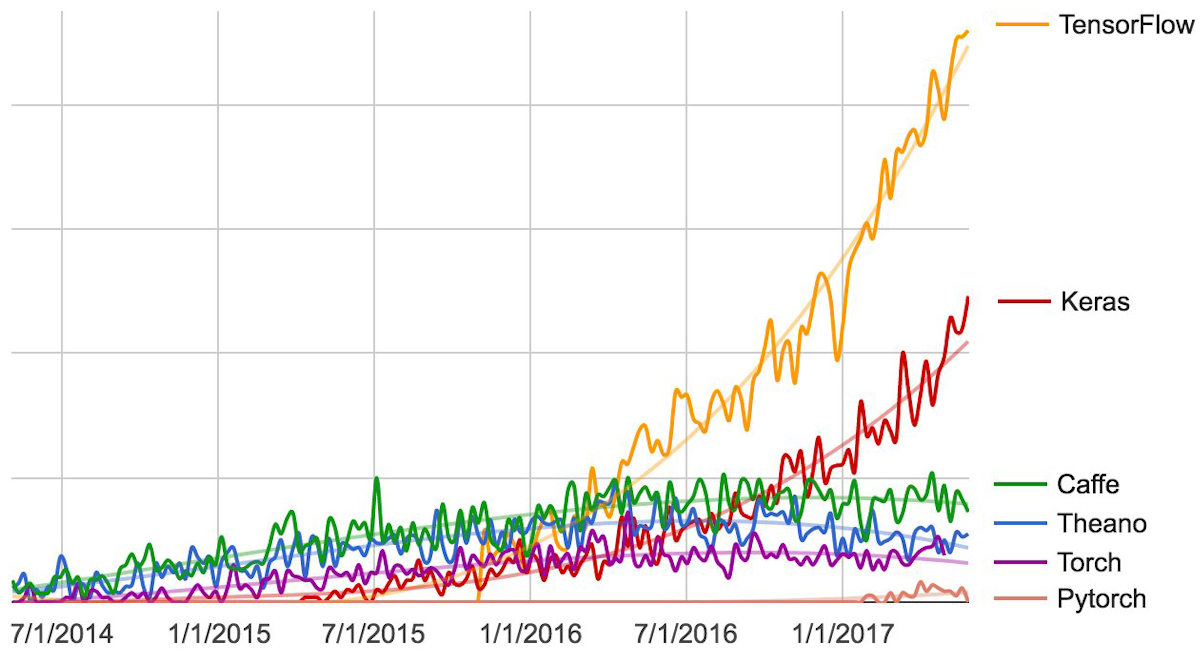

**3.2.1 Keras, TensorFlow, Theano, and CNTK**

Keras es una biblioteca a nivel de modelo, que proporciona bloques de construcción de alto nivel para desarrollar
modelos de aprendizaje profundo. No maneja operaciones de bajo nivel como la manipulación y diferenciación de tensores. En cambio, se basa en un tensor especializado y bien optimizado.
library para hacerlo, sirviendo como motor de backend de Keras. En lugar de elegir uno solo
biblioteca tensorial y vinculando la implementación de Keras a esa biblioteca, Keras maneja la
problema de forma modular (ver figura 3.3); por lo tanto, varios motores de backend diferentes pueden
conectarse sin problemas a Keras. Actualmente, las tres implementaciones de backend existentes son el backend de TensorFlow, el backend de Theano y Microsoft Cognitive
Backend del kit de herramientas (CNTK). En el futuro, es probable que Keras se extienda al trabajo
con aún más motores de ejecución de aprendizaje profundo.

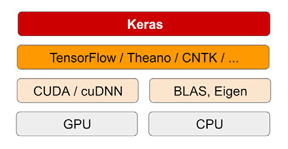

TensorFlow, CNTK y Theano son algunas de las plataformas principales para el aprendizaje profundo
hoy. Theano (http://deeplearning.net/software/theano) es desarrollado por MILA
laboratorio de la Université de Montréal, TensorFlow (www.tensorflow.org) es desarrollado por Google,
y CNTK (https://github.com/Microsoft/CNTK) es desarrollado por Microsoft. Ninguna
fragmento de código que escribe con Keras se puede ejecutar con cualquiera de estos backends sin
tener que cambiar algo en el código: puede cambiar sin problemas entre los dos
durante el desarrollo, lo que a menudo resulta útil, por ejemplo, si uno de estos backends
demuestra ser más rápido para una tarea específica. Recomendamos usar el backend de TensorFlow como
el predeterminado para la mayoría de sus necesidades de aprendizaje profundo, porque es el más adoptado,
escalable y listo para producción.
 A través de TensorFlow (o Theano, o CNTK), Keras puede ejecutarse sin problemas en ambos
CPU y GPU. Cuando se ejecuta en la CPU, TensorFlow en sí mismo está envolviendo un nivel bajo
biblioteca para operaciones tensoriales llamada Eigen (http://eigen.tuxfamily.org). En GPU,
TensorFlow incluye una biblioteca de operaciones de aprendizaje profundo bien optimizadas llamada
Biblioteca NVIDIA CUDA Deep Neural Network (cuDNN).

**3.2.2 Developing with Keras: a quick overview**

Ya ha visto un ejemplo de un modelo de Keras: el ejemplo de MNIST. Lo tipico
El flujo de trabajo de Keras se parece a ese ejemplo:

1 Defina sus datos de entrenamiento: tensores de entrada y tensores objetivo.

2 Defina una red de capas (o modelo) que mapee sus entradas a sus objetivos.

3 Configure el proceso de aprendizaje eligiendo una función de pérdida, un optimizador y algunas métricas para monitorear.

4 Itere sus datos de entrenamiento llamando al método fit () de su modelo.

Hay dos formas de definir un modelo: usando la clase Sequential (solo para lineal
pilas de capas, que es la arquitectura de red más común con diferencia) o la API funcional (para gráficos acíclicos dirigidos de capas, que le permite construir arquitecturas completamente arbitrarias).

  Como recordatorio, aquí hay un modelo de dos capas definido mediante la clase Sequential (nota
que estamos pasando la forma esperada de los datos de entrada a la primera capa):

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

Con la API funcional, estás manipulando los tensores de datos que procesa el modelo y aplicando capas a este tensor como si fueran funciones.

**NOTA:** Se puede obtener una guía detallada de lo que puede hacer con la API funcional.
que se encuentra en el capítulo 7. Hasta el capítulo 7, solo usaremos la clase Sequential
en nuestros ejemplos de código.
Una vez que se define la arquitectura de su modelo, no importa si utilizó un
Modelo secuencial o API funcional. Todos los siguientes pasos son iguales.

  El proceso de aprendizaje se configura en el paso de compilación, donde se especifica el
optimizador y función (es) de pérdida que el modelo debe utilizar, así como las métricas que
desea monitorear durante el entrenamiento. A continuación, se muestra un ejemplo con una función de pérdida única, que
es, con mucho, el caso más común:

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='mse',
metrics=['accuracy'])

Finalmente, el proceso de aprendizaje consiste en pasar matrices Numpy de datos de entrada (y el
datos de destino correspondientes) al modelo mediante el método fit (), similar a lo que
haría en Scikit-Learn y varias otras bibliotecas de aprendizaje automático:

In [ ]:
#model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

En los próximos capítulos, desarrollará una sólida intuición sobre qué tipo de red
Las arquitecturas funcionan para diferentes tipos de problemas, cómo elegir la configuración de aprendizaje correcta y cómo ajustar un modelo hasta que dé los resultados que desea ver. Bien
mire tres ejemplos básicos en las secciones 3.4, 3.5 y 3.6: una clasificación de dos clases
ejemplo, un ejemplo de clasificación de muchas clases y un ejemplo de regresión.

**3.3 Setting up a deep-learning workstation**

Antes de que pueda comenzar a desarrollar aplicaciones de aprendizaje profundo, debe configurar
su estación de trabajo. Es muy recomendable, aunque no estrictamente necesario, que
ejecute código de aprendizaje profundo en una GPU NVIDIA moderna. Algunas aplicaciones, en particular,
el procesamiento de imágenes con redes convolucionales y el procesamiento de secuencias con redes neuronales recurrentes será terriblemente lento en la CPU, incluso en una CPU multinúcleo rápida.
E incluso para las aplicaciones que se pueden ejecutar de manera realista en la CPU, generalmente verá
aumento de velocidad en un factor de 5 o 10 mediante el uso de una GPU moderna. Si no quieres
instale una GPU en su máquina, también puede considerar ejecutar sus experimentos en una instancia de GPU AWS EC2 o en Google Cloud Platform. Pero nota esa nube
Las instancias de GPU pueden volverse caras con el tiempo.

 Ya sea que esté ejecutando localmente o en la nube, es mejor usar una estación de trabajo Unix. Aunque es técnicamente posible usar Keras en Windows (los tres Keras
backends compatibles con Windows), no lo recomendamos. En las instrucciones de instalación
en el apéndice A, consideraremos una máquina Ubuntu. Si es un usuario de Windows, la solución más sencilla para que todo funcione es configurar un arranque dual de Ubuntu en su
máquina. Puede parecer una molestia, pero usar Ubuntu le ahorrará mucho tiempo y
problemas a largo plazo.

 Tenga en cuenta que para utilizar Keras, debe instalar TensorFlow o CNTK o Theano
(o todos ellos, si desea poder alternar entre los tres backends). En este libro, nos centraremos en TensorFlow, con algunas instrucciones ligeras relativas a
Theano. No cubriremos CNTK.

**3.3.1 Jupyter notebooks: the preferred way
to run deep-learning experiments**

Los cuadernos de Jupyter son una excelente manera de ejecutar experimentos de aprendizaje profundo, en particular,
los muchos ejemplos de código en este libro. Se utilizan ampliamente en la ciencia de datos y
comunidades de aprendizaje automático. Un cuaderno es un archivo generado por Jupyter Notebook
aplicación (https://jupyter.org), que puede editar en su navegador. Mezcla la capacidad de
ejecutar código Python con capacidades de edición de texto enriquecidas para anotar lo que está
haciendo. Un cuaderno también le permite dividir experimentos largos en partes más pequeñas.
que se puede ejecutar de forma independiente, lo que hace que el desarrollo sea interactivo y significa
no tiene que volver a ejecutar todo el código anterior si algo sale mal al final de una
experimentar.

 Recomendamos usar cuadernos de Jupyter para comenzar con Keras, aunque eso
no es un requisito: también puede ejecutar scripts Python independientes o ejecutar código desde dentro
un IDE como PyCharm. Todos los ejemplos de código de este libro están disponibles como código abierto
cuadernos; puede descargarlos del sitio web del libro en www.manning
.com / books / aprendizaje-profundo-con-python.

**3.3.2 Getting Keras running: two options**

Para comenzar en la práctica, recomendamos una de las siguientes dos opciones:

* Utilice la AMI de aprendizaje profundo EC2 oficial (https://aws.amazon.com/amazonai/amis) y ejecute los experimentos de Keras como cuadernos de Jupyter en EC2. Haz esto si
aún no tiene una GPU en su máquina local. El Apéndice B proporciona una
guía paso por paso.

* Instale todo desde cero en una estación de trabajo Unix local. Entonces puedes correr
ya sea cuadernos de Jupyter locales o una base de código Python normal. Haz esto si tu
ya tengo una GPU NVIDIA de gama alta. El Apéndice A proporciona una especificación de Ubuntu,
guía paso por paso.

Echemos un vistazo más de cerca a algunos de los compromisos que implica elegir una opción
sobre el otro.

**3.3.3 Running deep-learning jobs in the cloud: pros and cons**

Si aún no tiene una GPU que pueda usar para el aprendizaje profundo (una versión reciente y de alta
NVIDIA GPU), luego ejecutar experimentos de aprendizaje profundo en la nube es una forma simple y económica de comenzar sin tener que comprar hardware adicional. Si tu eres
con los cuadernos Jupyter, la experiencia de ejecutar en la nube no es diferente de
ejecutándose localmente. A mediados de 2017, la oferta en la nube que facilita el inicio
con aprendizaje profundo es definitivamente AWS EC2. El Apéndice B proporciona una guía paso a paso para
ejecutar cuadernos de Jupyter en una instancia de GPU EC2.

 Pero si eres un gran usuario del aprendizaje profundo, esta configuración no es sostenible a largo
término, o incluso por más de unas pocas semanas. Las instancias EC2 son caras: la instancia
tipo recomendado en el apéndice B (la instancia p2.xlarge, que no le proporcionará
con mucha potencia) cuesta 0.90 por hora a mediados de 2017. Mientras tanto, una GPU sólida de clase de consumidor le costará entre 1,000 y 1,500, un precio que ha sido
bastante estable a lo largo del tiempo, incluso cuando las especificaciones de estas GPU siguen mejorando. Si hablas en serio
sobre el aprendizaje profundo, debe configurar una estación de trabajo local con una o más GPU.

 En resumen, EC2 es una excelente manera de comenzar. Puede seguir los ejemplos de código en
este libro completamente en una instancia de GPU EC2. Pero si vas a ser un usuario avanzado de
aprendizaje profundo, obtenga sus propias GPU.

**3.3.4 What is the best GPU for deep learning?**

Si va a comprar una GPU, ¿cuál debería elegir? Lo primero a tener en cuenta es
que debe ser una GPU NVIDIA. NVIDIA es la única empresa de computación gráfica que
ha invertido mucho en aprendizaje profundo hasta ahora, y marcos modernos de aprendizaje profundo
solo se puede ejecutar en tarjetas NVIDIA.

  A mediados de 2017, recomendamos NVIDIA TITAN Xp como la mejor tarjeta del mercado para el aprendizaje profundo. Para presupuestos más bajos, es posible que desee considerar la GTX 1060. Si
está leyendo estas páginas en 2018 o más tarde, tómese el tiempo para buscar en línea
recomendaciones, porque cada año salen nuevos modelos.

De esta sección en adelante, asumiremos que tiene acceso a una máquina con
Keras y sus dependencias instaladas, preferiblemente con soporte de GPU. Asegúrese
finalice este paso antes de continuar. Consulte las guías paso a paso en los apéndices y busque en línea si necesita más ayuda. No hay escasez de tutoriales sobre
cómo instalar Keras y dependencias comunes de aprendizaje profundo.
  Ahora podemos sumergirnos en ejemplos prácticos de Keras.

**3.4 Classifying movie reviews:
a binary classification example**

La clasificación de dos clases, o clasificación binaria, puede ser el tipo de problema de aprendizaje automático más ampliamente aplicado. En este ejemplo, aprenderá a clasificar las reseñas de películas como positivas o negativas, según el contenido de texto de las reseñas.

**3.4.1. El conjunto de datos de IMDB**

Trabajará con el conjunto de datos de IMDB: un conjunto de 50.000 reseñas muy polarizadas de Internet Movie Database. Están divididos en 25,000 revisiones para capacitación y 25,000 revisiones para pruebas, cada conjunto consta de 50% críticas negativas y 50% positivas.

¿Por qué utilizar conjuntos de prueba y entrenamiento separados? ¡Porque nunca debe probar un modelo de aprendizaje automático con los mismos datos que usó para entrenarlo! El hecho de que un modelo funcione bien en sus datos de entrenamiento no significa que funcionará bien en datos que nunca ha visto; y lo que le importa es el rendimiento de su modelo en datos nuevos (porque ya conoce las etiquetas de sus datos de entrenamiento; obviamente, no necesita su modelo para predecirlos). Por ejemplo, es posible que su modelo termine simplemente memorizando un mapeo entre sus muestras de entrenamiento y sus objetivos, lo que sería inútil para la tarea de predecir objetivos para datos que el modelo nunca ha visto antes. Repasaremos este punto con mucho más detalle en el próximo capítulo.

Al igual que el conjunto de datos MNIST, el conjunto de datos IMDB viene empaquetado con Keras. Ya ha sido preprocesado: las revisiones (secuencias de palabras) se han convertido en secuencias de números enteros, donde cada número entero representa una palabra específica en un diccionario.

El siguiente código cargará el conjunto de datos (cuando lo ejecute por primera vez, se descargarán aproximadamente 80 MB de datos en su máquina).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import imdb

In [5]:
from keras.datasets import imdb

LIMIT_WORD = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=LIMIT_WORD)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

El argumento num_words=10000 significa que solo mantendrá las 10,000 palabras más frecuentes en los datos de entrenamiento. Se descartarán las palabras raras. Esto le permite trabajar con datos vectoriales de tamaño manejable.

Las variables train_data y test_data son listas de revisiones; cada revisión es una lista de índices de palabras (que codifican una secuencia de palabras). train_labels y test_labels son listas de 0 y 1, donde 0 significa negativo y 1 significa positivo :

In [24]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [25]:
train_labels[0]

1

Debido a que se está restringiendo a las 10,000 palabras más frecuentes, ningún índice de palabras superará las 10,000:

In [26]:
 max([max(sequence) for sequence in train_data])

9999

Para divertirse, así es como puede descodificar rápidamente una de estas reseñas en palabras en inglés:

In [45]:
def convert_to_english(sequence):
    word_index = imdb.get_word_index()
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    decoded_review = " ".join(
        [reverse_word_index.get(i - 3, '?') for i in sequence]
    )
    
    return decoded_review


In [46]:
print(convert_to_english(train_data[0]))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

**3.4.2. Preparing the data**

No puede alimentar listas de números enteros en una red neuronal. Tienes que convertir tus listas en tensores. Hay dos maneras de hacerlo:

* Rellene sus listas para que todas tengan la misma longitud, conviértalas en un tensor de forma entero (samples, word_indices)y luego use como primera capa en su red una capa capaz de manejar tales tensores enteros (la Embeddingcapa, que cubriremos en detalle más adelante en el libro).
* Codifique sus listas en un solo uso para convertirlas en vectores de 0 y 1. Esto significaría, por ejemplo, convertir la secuencia [3, 5]en un vector de 10,000 dimensiones que serían todos 0 excepto los índices 3 y 5, que serían 1. Luego, podría usar como primera capa en su red una Densecapa, capaz de manejar datos vectoriales de punto flotante.

Vayamos con la última solución para vectorizar los datos, lo que hará manualmente para obtener la máxima claridad.

In [6]:
#Codificar las secuencias enteras en una matriz binaria:

import numpy as np


def vectorize_sequences(sequences, dimension=LIMIT_WORD):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
# Ahora se ven asi:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
# Vectorizamos las etiquetas:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Ahora los datos están listos para ser alimentados a una red neuronal.

**3.4.3 Building your network**

Los datos de entrada son vectores y las etiquetas son escalares (1 y 0): esta es la configuración más fácil que encontrará. Un tipo de red que se desempeña bien en un problema tal es una simple pila de totalmente conectados ( Densecapas) con reluactivaciones: Dense(16, activation='relu').

El argumento que se pasa a cada Densecapa (16) es el número de unidades ocultas de la capa. Una unidad oculta es una dimensión en el espacio de representación de la capa. Puede recordar del capítulo 2 que cada una de estas Densecapas con una reluactivación implementa la siguiente cadena de operaciones tensoriales:

In [11]:
#output = relu(dot(W, input) + b)

Tener 16 unidades ocultas mediante el peso de la matriz W tendrá la forma (input_dimension, 16): el producto escalar con Wproyectará los datos de entrada en un espacio de representación 16 dimensiones (y luego se le agrega el vector de polarización by aplicar la reluoperación). Puede entender intuitivamente la dimensionalidad de su espacio de representación como "cuánta libertad está permitiendo que tenga la red cuando aprende representaciones internas". Tener más unidades ocultas (un espacio de representación de mayor dimensión) permite que su red aprenda representaciones más complejas, pero hace que la red sea más costosa computacionalmente y puede conducir al aprendizaje de patrones no deseados (patrones que mejorarán el rendimiento en los datos de entrenamiento pero no en los datos de prueba).

Hay dos decisiones de arquitectura clave que se deben tomar sobre tal pila de Densecapas:

* Cuantas capas usar
* Cuántas unidades ocultas elegir para cada capa

En el capítulo 4 , aprenderá los principios formales que lo guiarán al tomar estas decisiones. Por el momento, tendrá que confiarme la siguiente elección de arquitectura:

* Dos capas intermedias con 16 unidades ocultas cada una
* Una tercera capa que generará la predicción escalar con respecto al sentimiento de la revisión actual

Las capas intermedias utilizarán relucomo función de activación, y la capa final utilizará una activación sigmoidea para generar una probabilidad (una puntuación entre 0 y 1, que indica la probabilidad de que la muestra tenga el objetivo "1": la probabilidad de la revisión debe ser positiva). Una relu(unidad lineal rectificada) es una función destinada a poner a cero los valores negativos (ver figura 3.4 ), mientras que un sigmoide "aplasta" valores arbitrarios en el [0, 1]intervalo (ver figura 3.5 ), generando algo que se puede interpretar como una probabilidad.

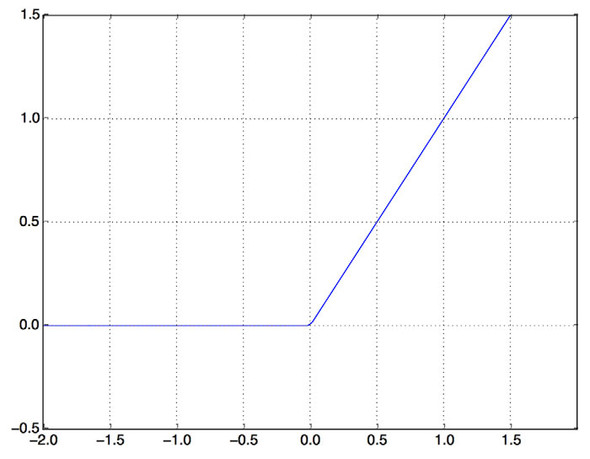

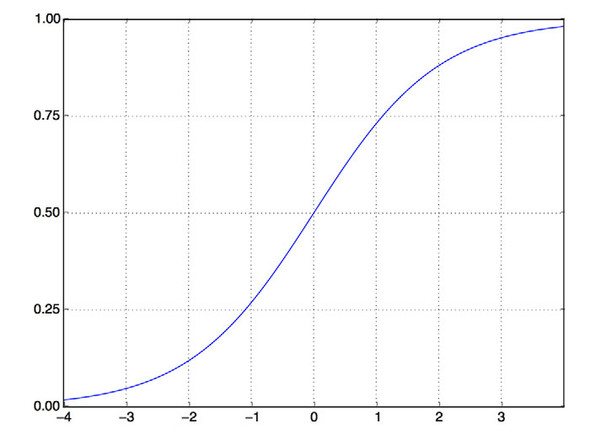

La figura 3.6 muestra cómo se ve la red. Y aquí está la implementación de Keras, similar al ejemplo de MNIST que vio anteriormente.

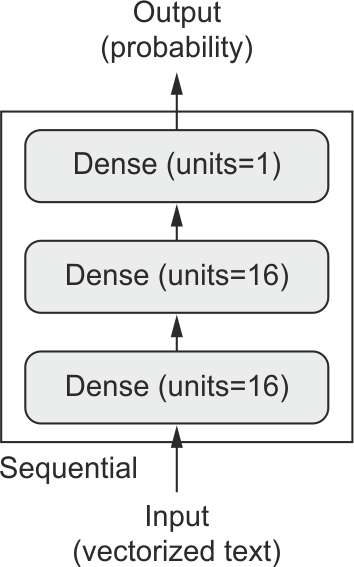

In [9]:
# The Model Definition:

from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


**¿Qué son las funciones de activación y por qué son necesarias?**

Sin una función de activación como relu (también llamada no linealidad), la capa densa
consistiría en dos operaciones lineales: un producto escalar y una adición:

output = dot(W, input) + b

Entonces, la capa solo pudo aprender transformaciones lineales (transformaciones afines) de la
datos de entrada: el espacio de hipótesis de la capa sería el conjunto de todos los posibles lineales
transformaciones de los datos de entrada en un espacio de 16 dimensiones. Tal hipótesis
el espacio es demasiado restringido y no se beneficiaría de múltiples capas de representaciones,
porque una pila profunda de capas lineales aún implementaría una operación lineal: agregar
más capas no extenderían el espacio de hipótesis.

Para tener acceso a un espacio de hipótesis mucho más rico que se beneficiaría de
representaciones profundas, necesita una función de no linealidad o activación. relu es el
La función de activación más popular en el aprendizaje profundo, pero hay muchos otros candidatos, todos con nombres igualmente extraños: prelu, elu, etc.

Finalmente, debe elegir una función de pérdida y un optimizador. Porque te enfrentas a un
problema de clasificación binaria y la salida de su red es una probabilidad (termina
su red con una capa de una sola unidad con una activación sigmoidea), es mejor utilizar el pérdida de binary_crossentropy. No es la única opción viable: podría utilizar, por ejemplo,
error medio cuadrado. Pero la entropía cruzada suele ser la mejor opción cuando se trata
con modelos que generan probabilidades. La entropía cruzada es una cantidad del campo de la teoría de la información que mide la distancia entre distribuciones de probabilidad o, en este caso
caso, entre la distribución de la verdad fundamental y sus predicciones.

  Este es el paso en el que configura el modelo con el optimizador rmsprop y
la función de pérdida binary_crossentropy. Tenga en cuenta que también supervisará la precisión
durante el entrenamiento.

In [10]:
# Compiling the model:

model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

Estás pasando tu optimizador, función de pérdida y métricas como cadenas, lo cual es posible
porque rmsprop, binary_crossentropy y precision están empaquetados como parte de Keras.
A veces, es posible que desee configurar los parámetros de su optimizador o pasar una función de pérdida personalizada o una función métrica. Lo primero se puede hacer pasando un optimizador
instancia de clase como argumento del optimizador, como se muestra en el listado 3.5; este último puede ser
hecho pasando objetos de función como los argumentos de pérdida y / o métricas, como se muestra en
listado 3.6

In [33]:
# Configuring the optimizer:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [34]:
# Using custom losses and metrics:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

**3.4.4 Validating your approach**

Para monitorear durante el entrenamiento la precisión del modelo en los datos, nunca
visto antes, creará un conjunto de validación separando 10,000 muestras del
datos de entrenamiento originales.

In [11]:
# Dejando un conjunto de validacion:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Ahora entrenará el modelo durante 20 épocas (20 iteraciones sobre todas las muestras en el
tensores x_train y y_train), en mini lotes de 512 muestras. Al mismo tiempo,
supervisará la pérdida y la precisión en las 10,000 muestras que separó. Lo haces por
pasando los datos de validación como el argumento validation_data.

In [12]:
# training the model:

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.5944 - binary_accuracy: 0.7116 - val_loss: 0.3955 - val_binary_accuracy: 0.8664
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3301 - binary_accuracy: 0.9031 - val_loss: 0.3129 - val_binary_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2297 - binary_accuracy: 0.9321 - val_loss: 0.2802 - val_binary_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1816 - binary_accuracy: 0.9454 - val_loss: 0.2777 - val_binary_accuracy: 0.8886
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1469 - binary_accuracy: 0.9545 - val_loss: 0.2773 - val_binary_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1184 - binary_accuracy: 0.9667 - val_loss: 0.2925 - val_binary_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - los

En la CPU, esto tomará menos de 2 segundos por época; el entrenamiento termina en 20 segundos.
Al final de cada época, hay una pequeña pausa mientras el modelo calcula su pérdida y
precisión en las 10,000 muestras de los datos de validación.
  Tenga en cuenta que la llamada a model.fit () devuelve un objeto History. Este objeto tiene un historial de miembros, que es un diccionario que contiene datos sobre todo lo que sucedió.
durante el entrenamiento. Veámoslo:

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

El diccionario contiene cuatro entradas: una por métrica que se supervisó durante
formación y durante la validación. En la siguiente lista de dos, usemos Matplotlib para trazar
la pérdida de entrenamiento y validación lado a lado (ver figura 3.7), así como el entrenamiento y
precisión de la validación (ver figura 3.8). Tenga en cuenta que sus propios resultados pueden variar ligeramente debido a
una inicialización aleatoria diferente de su red.

<function matplotlib.pyplot.show>

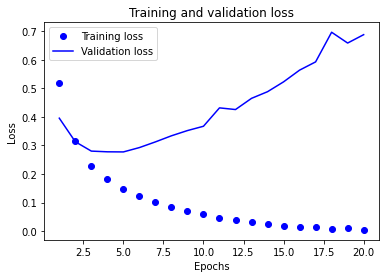

In [14]:
# Plot training and validation loss:

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['binary_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show>

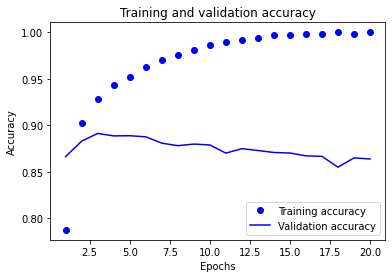

In [15]:
# PLOT training and accuracy:

plt.clf()

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

Como puede ver, la pérdida de entrenamiento disminuye con cada época y la precisión del entrenamiento
aumenta con cada época. Eso es lo que esperaría al ejecutar la optimización de gradiente descendente; la cantidad que está tratando de minimizar debería ser menor con
cada iteración. Pero ese no es el caso de la pérdida y precisión de la validación: parecen
pico en la cuarta época. Este es un ejemplo de lo que advertimos anteriormente: un
modelo que funciona mejor en los datos de entrenamiento no es necesariamente un modelo que funcione
mejor en datos que nunca antes había visto. En términos precisos, lo que está viendo es un sobreajuste: después de la segunda época, está sobreoptimizando los datos de entrenamiento y termina
hasta las representaciones de aprendizaje que son específicas de los datos de entrenamiento y no generalizan
a datos fuera del conjunto de entrenamiento.

 En este caso, para evitar un sobreajuste, puede dejar de entrenar después de tres épocas. En
En general, puede utilizar una variedad de técnicas para mitigar el sobreajuste, que cubriremos en
Capítulo 4.

 Entrenemos una nueva red desde cero durante cuatro épocas y luego evaluémosla en el
datos de prueba.

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)
model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=512
)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.5664 - binary_accuracy: 0.7522
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2878 - binary_accuracy: 0.9062
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2129 - binary_accuracy: 0.9243
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2862 - binary_accuracy: 0.8868


In [17]:
print(results)

[0.2862410843372345, 0.8867999911308289]


Este enfoque bastante ingenuo logra una precisión del 88%. Con el estado de la técnica
enfoques, debería poder acercarse al 95%.

**3.4.5 Using a trained network to generate predictions on new data**

Después de haber entrenado una red, querrá usarla en un entorno práctico. Puede generar la probabilidad de que las reseñas sean positivas mediante el método de predicción:

In [18]:
model.predict(x_test)

array([[0.23241234],
       [0.99963033],
       [0.82334256],
       ...,
       [0.10593924],
       [0.06203151],
       [0.5483866 ]], dtype=float32)

Como puede ver, la red es segura para algunas muestras (0,99 o más, o 0,01 o
menos) pero menos seguro para los demás (0.6, 0.4).

**3.4.6 Further experiments**

Los siguientes experimentos lo ayudarán a convencerse de que las elecciones de arquitectura que ha
realizados son bastante razonables, aunque todavía hay margen de mejora:
* Usaste dos capas ocultas. Intente usar una o tres capas ocultas y vea cómo
hacerlo afecta la validación y la precisión de la prueba.
* Intente usar capas con más unidades ocultas o menos unidades ocultas: 32 unidades, 64 unidades,
y así.
* Intente usar la función de pérdida mse en lugar de binary_crossentropy.
* Intente usar la activación de tanh (una activación que era popular en los primeros días de
redes neuronales) en lugar de relu.

**3.4.7 Wrapping up**

Esto es lo que debería sacar de este ejemplo:
* Por lo general, necesita hacer un poco de preprocesamiento en sus datos sin procesar para
ser capaz de alimentarlo, como tensores, en una red neuronal. Las secuencias de palabras pueden
codificarse como vectores binarios, pero también hay otras opciones de codificación.
* Las pilas de capas densas con activaciones relu pueden resolver una amplia gama de problemas
(incluida la clasificación de opiniones) y es probable que los utilice con frecuencia.
* En un problema de clasificación binaria (dos clases de salida), su red debe
terminar con una capa densa con una unidad y una activación sigmoidea: la salida de
su red debe ser un escalar entre 0 y 1, codificando una probabilidad.
* Con una salida sigmoidea escalar en un problema de clasificación binaria, la pérdida
* La función que debe utilizar es binary_crossentropy.
* El optimizador rmsprop es generalmente una buena opción, sea cual sea su problema. Eso es una cosa menos de la que debe preocuparse.
* A medida que mejoran sus datos de entrenamiento, las redes neuronales eventualmente comienzan a sobreajustarse y terminan obteniendo resultados cada vez peores en datos que nunca antes
visto antes. Asegúrese de supervisar siempre el rendimiento de los datos que están fuera de
el conjunto de entrenamiento.

**3.5 Classifying newswires:
un ejemplo de clasificación multiclase**

En la sección anterior, vio cómo clasificar entradas vectoriales en dos clases mutuamente excluyentes utilizando una red neuronal densamente conectada. Pero que pasa cuando tu
¿Tienes más de dos clases?
  En esta sección, creará una red para clasificar los cables de noticias de Reuters en 46
temas exclusivos. Dado que tiene muchas clases, este problema es una instancia de clasificación multiclase; y dado que cada punto de datos debe clasificarse en una sola categoría, el problema es más específicamente una instancia de clasificación multiclase de etiqueta única.
Si cada punto de datos pudiera pertenecer a varias categorías (en este caso, temas), estaría
enfrentando un problema de clasificación de múltiples etiquetas y clases.

**3.5.1 The Reuters dataset**

Trabajará con el conjunto de datos de Reuters, un conjunto de cables de noticias breves y sus temas, publicados
por Reuters en 1986. Es un conjunto de datos de juguetes simple y ampliamente utilizado para la clasificación de texto. Allí
son 46 temas diferentes; algunos temas están más representados que otros, pero cada tema
tiene al menos 10 ejemplos en el conjunto de entrenamiento.
  Al igual que IMDB y MNIST, el conjunto de datos de Reuters viene empaquetado como parte de Keras. Vamos
echar un vistazo.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

In [21]:
LIMIT_WORD = 10000

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=LIMIT_WORD)


2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [22]:
len(train_data)

8982

In [23]:
len(test_data)

2246

Al igual que con las revisiones de IMDB, cada ejemplo es una lista de números enteros (índices de palabras)

In [24]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [25]:
# Data exploring (convert sequences to original review)

def convert_to_english(sequence):
    word_index = reuters.get_word_index()
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    decoded_review = " ".join(
        [reverse_word_index.get(i - 3, '?') for i in sequence]
    )
    
    return decoded_review

In [26]:
# Encoding the data:
def vectorize_sequences(sequences, dimension=LIMIT_WORD):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

In [27]:
# Vectorize the examples:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [28]:
#One-hot encoding of labels (categorical encoding)
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [29]:
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Architecture**

* 2 intermediate Dense layers with 16 hidden unites per each (relu actovation function)

* 1 output layer (with sigmoid activation function)

In [30]:
# Building the network:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

**Compile**

**Loss function: binary crossentropy Optimizer: rmsprop**

In [32]:
model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

**Training**

* Define validation data
* Define epochs and batch size
* Fit the model

In [33]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [34]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 1s 59ms/step - loss: 3.3192 - categorical_accuracy: 0.3464 - val_loss: 1.8957 - val_categorical_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.6171 - categorical_accuracy: 0.6900 - val_loss: 1.3668 - val_categorical_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.1304 - categorical_accuracy: 0.7606 - val_loss: 1.1611 - val_categorical_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8783 - categorical_accuracy: 0.8164 - val_loss: 1.0596 - val_categorical_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.7007 - categorical_accuracy: 0.8529 - val_loss: 0.9786 - val_categorical_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5473 - categorical_accuracy: 0.8871 - val_loss: 0.9262 - val_categorical_accuracy: 0.8170
Epoch 7/20

**PLOT**

<function matplotlib.pyplot.show>

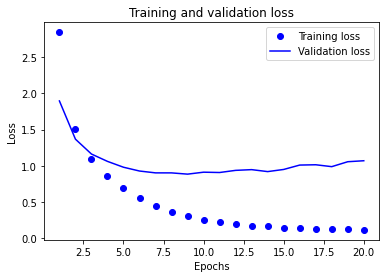

In [35]:
# Training and validation:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['categorical_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

In [36]:
history_dict.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

<function matplotlib.pyplot.show>

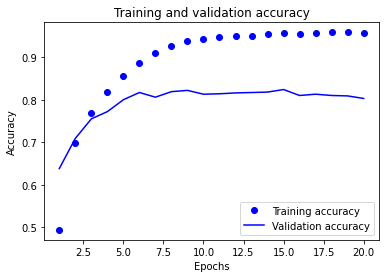

In [38]:
# Training and validation accuracy:
plt.clf()

acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

La red comienza a adaptarse después de nueve épocas. Entrenemos una nueva red de
rayar durante nueve épocas y luego evaluarlo en el equipo de prueba.

In [39]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)
model.fit(
    partial_x_train,
    partial_y_train,
    epochs=10,
    batch_size=512,
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/10
16/16 [==============================] - 2s 73ms/step - loss: 3.1558 - categorical_accuracy: 0.4204 - val_loss: 1.8017 - val_categorical_accuracy: 0.6230
Epoch 2/10
16/16 [==============================] - 1s 46ms/step - loss: 1.5854 - categorical_accuracy: 0.6767 - val_loss: 1.3647 - val_categorical_accuracy: 0.7140
Epoch 3/10
16/16 [==============================] - 1s 45ms/step - loss: 1.1408 - categorical_accuracy: 0.7598 - val_loss: 1.1804 - val_categorical_accuracy: 0.7360
Epoch 4/10
16/16 [==============================] - 1s 46ms/step - loss: 0.8935 - categorical_accuracy: 0.8101 - val_loss: 1.0664 - val_categorical_accuracy: 0.7730
Epoch 5/10
16/16 [==============================] - 1s 46ms/step - loss: 0.7124 - categorical_accuracy: 0.8544 - val_loss: 1.0083 - val_categorical_accuracy: 0.7850
Epoch 6/10
16/16 [==============================] - 1s 45ms/step - loss: 0.5708 - categorical_accuracy: 0.8871 - val_loss: 0.9334 - val_categorical_accuracy: 0.8120
Epoch 7/10

In [40]:
print(results)

[0.9898924231529236, 0.7894033789634705]


Este enfoque alcanza una precisión de ~ 80%. Con una clasificación binaria equilibrada
problema, la precisión alcanzada por un clasificador puramente aleatorio sería del 50%. Pero en
en este caso, está más cerca del 19%, por lo que los resultados parecen bastante buenos, al menos en comparación con
una línea de base aleatoria:

In [41]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18655387355298308

**3.5.5 Generating predictions on new data**

Puede verificar que el método de predicción de la instancia del modelo devuelve una probabilidad
distribución sobre los 46 temas. Generemos predicciones de temas para todos los datos de prueba.

In [43]:
predictions = model.predict(x_test)
predictions

array([[1.1241137e-05, 4.5885863e-05, 2.1963409e-05, ..., 5.0210105e-07,
        6.0230406e-07, 7.6090322e-07],
       [5.5248514e-02, 1.0176036e-01, 1.0266555e-02, ..., 2.6254480e-05,
        1.9357400e-03, 7.2321044e-03],
       [4.3924332e-02, 4.9523965e-01, 6.4319119e-02, ..., 5.0400349e-04,
        1.1884674e-02, 4.5998879e-03],
       ...,
       [1.2296407e-05, 4.7703204e-04, 6.2243380e-05, ..., 1.2869336e-06,
        1.0171176e-06, 1.5944048e-06],
       [2.8786712e-04, 1.8665482e-01, 1.6654854e-03, ..., 2.9042427e-05,
        1.1995910e-04, 2.9122431e-04],
       [1.0573749e-03, 5.9756303e-01, 3.7300356e-02, ..., 1.4283153e-04,
        3.0821085e-04, 2.6850114e-04]], dtype=float32)

Cada entrada en las predicciones es un vector de longitud 46:


In [44]:
predictions[0].shape

(46,)

Los coeficientes en este vector suman 1:

In [45]:
np.sum(predictions[0])

0.99999994

La entrada más grande es la clase predicha, la clase con mayor probabilidad:

In [46]:
np.argmax(predictions[0])

3

**3.5.6 A different way to handle the labels and the loss**

Mencionamos anteriormente que otra forma de codificar las etiquetas sería convertirlas como
un tensor entero, como este:

In [47]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

Lo único que cambiaría este enfoque es la elección de la función de pérdida. La pérdida
función utilizada en el listado 3.21, categorical_crossentropy, espera que las etiquetas sigan
una codificación categórica. Con etiquetas enteras, debe usar sparse_categorical_
entropía cruzada:

In [48]:
# model.compile(optimizer='rmsprop',
# loss='sparse_categorical_crossentropy',
# metrics=['acc'])

Esta nueva función de pérdida sigue siendo matemáticamente la misma que categorical_crossentropy;
simplemente tiene una interfaz diferente.

**3.5.9 Wrapping up**

Esto es lo que debería sacar de este ejemplo:
* Si está intentando clasificar puntos de datos entre N clases, su red debería terminar
con una capa densa de tamaño N.
* En un problema de clasificación multiclase de etiqueta única, su red debe terminar
con una activación softmax de modo que generará una distribución de probabilidad sobre el
N clases de salida.
* La entropía cruzada categórica es casi siempre la función de pérdida que debe usar para
tales problemas. Minimiza la distancia entre las distribuciones de probabilidad.
salida de la red y la verdadera distribución de los objetivos.
* Hay dos formas de manejar etiquetas en clasificación multiclase:
 - Codificación de las etiquetas mediante codificación categórica (también conocida como codificación one-hot) y uso de categorical_crossentropy como función de pérdida
 - Codificar las etiquetas como números enteros y usar sparse_categorical_crossentropy
función de pérdida
* Si necesita clasificar datos en una gran cantidad de categorías, debe evitar
creando cuellos de botella de información en su red debido a capas intermedias
que son demasiado pequeños.

**3.6 Predicting house prices: a regression example**

Los dos ejemplos anteriores se consideraron problemas de clasificación, donde el objetivo
era predecir una sola etiqueta discreta de un punto de datos de entrada. Otro tipo común de
El problema del aprendizaje automático es la regresión, que consiste en predecir una
valor en lugar de una etiqueta discreta: por ejemplo, predecir la temperatura mañana,
datos meteorológicos dados; o predecir el tiempo que tardará un proyecto de software en
completo, dadas sus especificaciones.

**NOTA**: No confunda la regresión con el algoritmo de regresión logística. Confusamente, la regresión logística no es un algoritmo de regresión, es una clasificación
algoritmo.

**3.6.1 The Boston Housing Price dataset**

Intentará predecir el precio medio de las viviendas en un suburbio determinado de Boston en el
mediados de la década de 1970, dados puntos de datos sobre el suburbio en ese momento, como la tasa de criminalidad, la
tasa de impuesto a la propiedad local, y así sucesivamente. El conjunto de datos que usará tiene una diferencia interesante
de los dos ejemplos anteriores. Tiene relativamente pocos puntos de datos: solo 506, dividido
entre 404 muestras de entrenamiento y 102 muestras de prueba. Y cada característica en los datos de entrada
(por ejemplo, la tasa de criminalidad) tiene una escala diferente. Por ejemplo, algunos valores son proporciones, que toman valores entre 0 y 1; otros toman valores entre 1 y 12, otros entre 0 y 100, y así sucesivamente.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import boston_housing

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

Como puede ver, tiene 404 muestras de entrenamiento y 102 muestras de prueba, cada una con 13
características numéricas, como tasa de criminalidad per cápita, número promedio de habitaciones por vivienda, accesibilidad a las carreteras, etc.

  Los objetivos son los valores medios de las viviendas ocupadas por sus propietarios, en miles de
dólares:

In [6]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [7]:
train_targets[0]

15.2

Los precios suelen oscilar entre 10,000 y 50,000. Si eso suena barato, recuerde que esto fue a mediados de la década de 1970, y estos precios no están ajustados por inflación

**3.6.2 Preparing the data**

Sería problemático alimentar a una red neuronal valores que toman rangos muy diferentes. La red podría adaptarse automáticamente a tan heterogéneos
datos, pero definitivamente dificultaría el aprendizaje. Una mejor práctica generalizada
tratar con tales datos es hacer una normalización de características: para cada característica en la entrada
datos (una columna en la matriz de datos de entrada), resta la media de la característica y
dividir por la desviación estándar, de modo que la característica se centre alrededor de 0 y tenga una
desviación estándar unitaria. Esto se hace fácilmente en Numpy.

In [8]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

Tenga en cuenta que las cantidades utilizadas para normalizar los datos de prueba se calculan utilizando el
datos de entrenamiento. Nunca debe utilizar en su flujo de trabajo ninguna cantidad calculada en el
probar datos, incluso para algo tan simple como la normalización de datos.

**3.6.3 Building your network**

Como hay tan pocas muestras disponibles, utilizará una red muy pequeña con dos
capas, cada una con 64 unidades. En general, cuantos menos datos de entrenamiento tenga, peor será el sobreajuste, y el uso de una red pequeña es una forma de mitigar el sobreajuste.

Esta será una regresión escalar, por lo que la red terminará con una sola unidad y sin activación. Siendo la capa puramente lineal, la red es libre de aprender valores en cualquier rango.

**Loss:** mse, error cuadrático medio, que es el cuadrado de la diferencia entre las predicciones y los objetivos.

**Metrics:** error absoluto medio (mae), que es el valor absoluto de la diferencia entre predicciones y objetivos.

In [9]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

La red termina con una sola unidad y sin activación (será una capa lineal). Esto es
una configuración típica para la regresión escalar (una regresión en la que se intenta predecir una
valor continuo). La aplicación de una función de activación limitaría el rango que puede tomar la salida; por ejemplo, si aplicó una función de activación sigmoidea a la última capa,
la red solo pudo aprender a predecir valores entre 0 y 1. Aquí, porque el último
capa es puramente lineal, la red es libre de aprender a predecir valores en cualquier rango. 

Tenga en cuenta que compila la red con la función de pérdida mse: error cuadrático medio,
el cuadrado de la diferencia entre las predicciones y los objetivos. Esta es una amplia
utiliza la función de pérdida para problemas de regresión.

  También estás monitoreando una nueva métrica durante el entrenamiento: error absoluto medio (MAE). Sus
el valor absoluto de la diferencia entre las predicciones y los objetivos. por
Por ejemplo, un MAE de 0.5 en este problema significaría que sus predicciones están desfasadas en $ 500
de media.


**3.6.4 Validating your approach using K-fold validation**

Para evaluar su red mientras sigue ajustando sus parámetros (como el número
de épocas utilizadas para el entrenamiento), puede dividir los datos en un conjunto de entrenamiento y un conjunto de validación, como lo hizo en los ejemplos anteriores. Pero debido a que tiene tan pocos puntos de datos,
el conjunto de validación terminaría siendo muy pequeño (por ejemplo, alrededor de 100 ejemplos).
Como consecuencia, las puntuaciones de validación pueden cambiar mucho según los datos
puntos que eligió usar para la validación y que eligió para el entrenamiento: la validación
las puntuaciones pueden tener una gran variación con respecto a la división de validación. Esto evitaría que evalúe su modelo de manera confiable.

 La mejor práctica en tales situaciones es utilizar la validación cruzada de K-fold (ver figura 3.11).
Consiste en dividir los datos disponibles en K particiones (típicamente K = 4 o 5), instanciar K modelos idénticos y entrenar cada uno en K - 1 particiones mientras se evalúa en
la partición restante. La puntuación de validación para el modelo utilizado es entonces el promedio de
las puntuaciones de validación K obtenidas. En términos de código, esto es sencillo

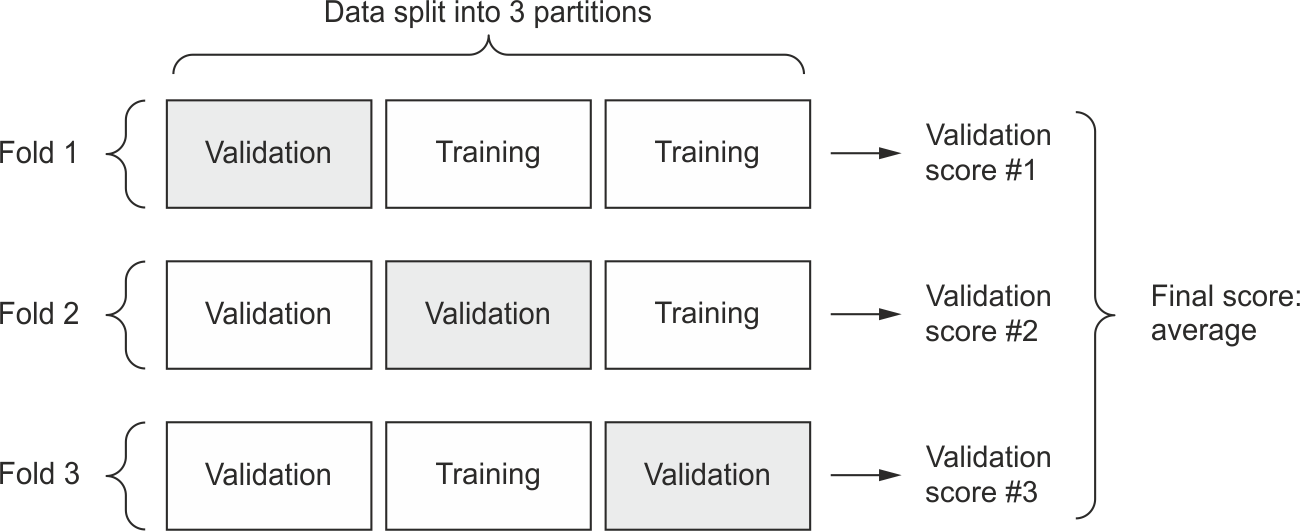

In [10]:
# KFold Validation:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [11]:
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([
        train_data[: i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]
        ], axis=0
    )
    partial_train_targets = np.concatenate([
        train_targets[: i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:],
        ], axis=0
    )
    
    model = build_model()
    model.fit(
        partial_train_data,
        partial_train_targets,
        epochs=num_epochs,
        batch_size=1,
        verbose=0
    )
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


Ejecutar esto con num_epochs = 100 produce los siguientes resultados:

In [12]:
all_scores

[2.0515623092651367,
 2.7151288986206055,
 2.6126773357391357,
 2.7017433643341064]

In [13]:
np.mean(all_scores)

2.520277976989746


De hecho, las diferentes ejecuciones muestran puntuaciones de validación bastante diferentes, de 2.6 a 3.2.
El promedio (3.0) es una métrica mucho más confiable que cualquier puntaje único; ese es el
punto completo de validación cruzada de K-fold. En este caso, tiene un descuento de 3,000 en promedio,
lo cual es significativo considerando que los precios oscilan entre 10,000 y 50,000.

  Intentemos entrenar la red un poco más: 500 épocas. Para mantener un registro de cómo
Bueno, el modelo lo hace en cada época, modificará el ciclo de entrenamiento para guardar el registro de puntuación de validación de perepoch. 

**Tunning**

In [14]:
all_mae_histories = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([
        train_data[: i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]
        ], axis=0
    )
    partial_train_targets = np.concatenate([
        train_targets[: i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:],
        ], axis=0
    )
    
    model = build_model()
    history = model.fit(
        partial_train_data,
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs,
        batch_size=1,
        verbose=0
    )
    
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


A continuación, puede calcular el promedio de las puntuaciones MAE por época para todos los pliegues.

In [15]:
average_mae_history = [
    np.mean([hist[i] for hist in all_mae_histories]) for i in range (num_epochs)
]

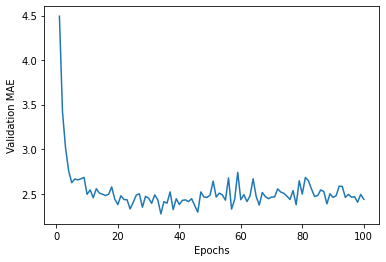

In [16]:
# Plot
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Puede resultar un poco difícil ver la trama debido a problemas de escala y a una variación relativamente alta. Hagamos lo siguiente:
* Omita los primeros 10 puntos de datos, que se encuentran en una escala diferente al resto de la curva.
* Reemplace cada punto con una media móvil exponencial de los puntos anteriores,
para obtener una curva suave.

In [17]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    
    return smoothed_points

In [18]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

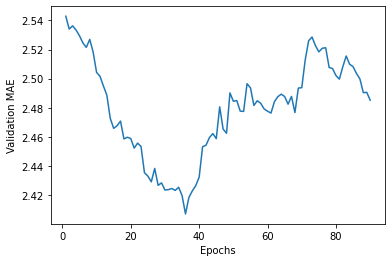

In [19]:
plt.clf()
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Según este gráfico, la validación MAE deja de mejorar significativamente después de 80 épocas.

Pasado ese punto, comienza a sobreajustarse.
  Una vez que haya terminado de ajustar otros parámetros del modelo (además del
número de épocas, también puede ajustar el tamaño de las capas ocultas), puede entrenar un
modelo de producción final en todos los datos de entrenamiento, con los mejores parámetros, y luego
mire su desempeño en los datos de prueba.

In [20]:
model = build_model()
model.fit(
    train_data,
    train_targets,
    epochs=55,
    batch_size=16,
    verbose=0
)
    
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 18.5649 - mae: 2.6196


In [21]:
test_mae_score

2.619568109512329

Todavía tiene un descuento de alrededor de 2,550$

**3.6.5 Conclusión**
Esto es lo que debería sacar de este ejemplo:
* La regresión se realiza usando funciones de pérdida diferentes a las que usamos para la clasificación. El error cuadrático medio (MSE) es una función de pérdida comúnmente utilizada para la regresión.
* De manera similar, las métricas de evaluación que se utilizarán para la regresión difieren de las utilizadas para
clasificación; naturalmente, el concepto de precisión no se aplica a la regresión. Una métrica de regresión común es el error absoluto medio (MAE).
* Cuando las entidades en los datos de entrada tienen valores en diferentes rangos, cada entidad
se debe escalar de forma independiente como un paso de preprocesamiento.
* Cuando hay pocos datos disponibles, usar la validación de K-fold es una excelente manera de evaluar un modelo de manera confiable.
* Cuando hay pocos datos de entrenamiento disponibles, es preferible utilizar una red pequeña con
pocas capas ocultas (normalmente solo una o dos), para evitar un sobreajuste severo.